In [1]:
# import tensorflow as tf

# import numpy as np
# import matplotlib.pyplot as plt

# from tensorflow.examples.tutorials.mnist import input_data

# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# fig, ax = plt.subplots(11, 10, figsize=(10, 11))
# k= 0
# for i in range(10):
#     for j in range(10):
#         ax[i, j].imshow(mnist.train.images[k].reshape(28, 28), cmap='gray', aspect='auto')
#         # ax[i, j].axis('off')
#         k += 1
# plt.show()

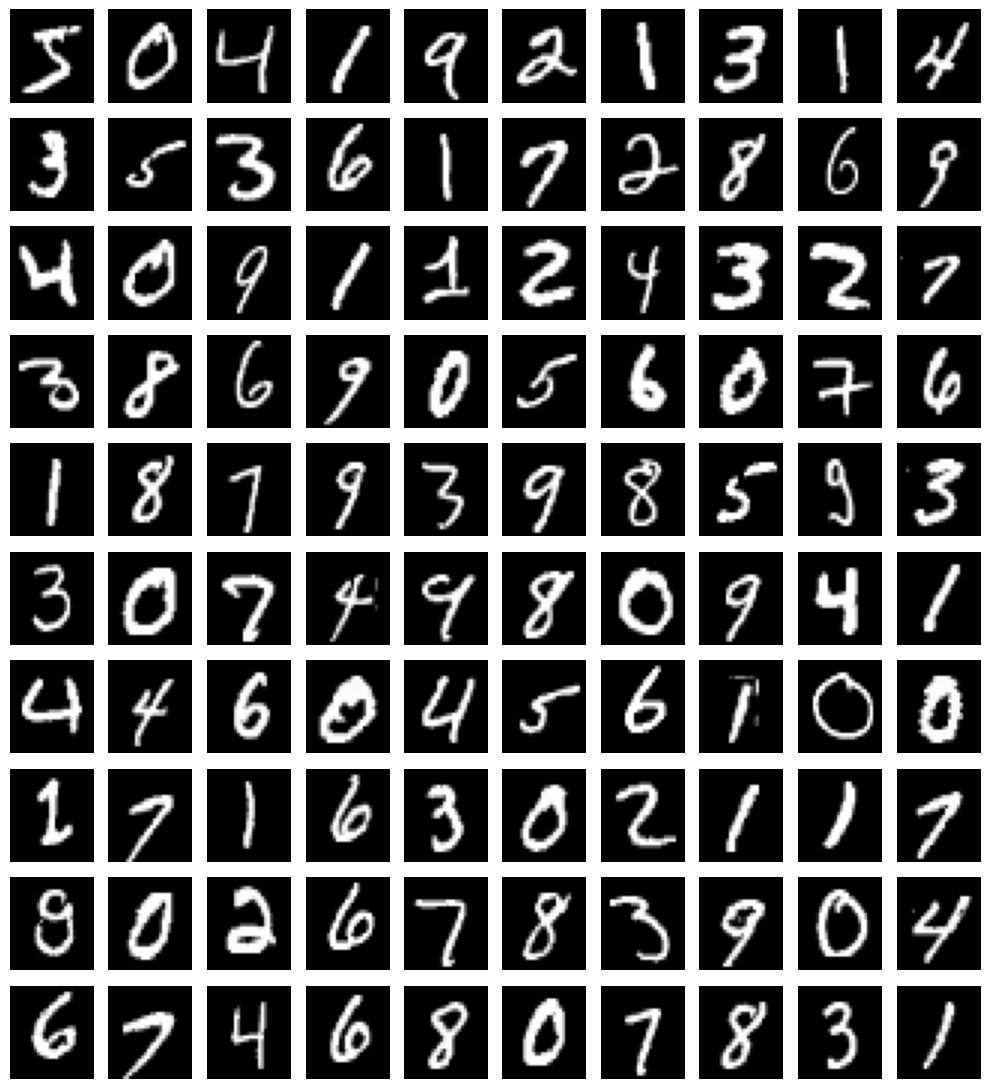

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset using tf.keras (TF 2.x way)
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0, 1]
x_train = x_train.astype('float32') / 255.0

# Plot 100 digits in a 10x10 grid
fig, ax = plt.subplots(10, 10, figsize=(10, 11))
k = 0
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(x_train[k], cmap='gray', aspect='auto')
        ax[i, j].axis('off')
        k += 1

plt.tight_layout()
plt.show()


In [3]:
# Display the shape of the training data
print("MNIST dataset loaded and displayed successfully.", x_train.shape)


MNIST dataset loaded and displayed successfully. (60000, 28, 28)


In [4]:
# Display the shape of the training data
print("MNIST dataset loaded and displayed successfully.", x_train.shape, y_train.shape)


MNIST dataset loaded and displayed successfully. (60000, 28, 28) (60000,)


In [5]:

# One-hot encode training labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)

In [6]:
print("One-hot shape:", y_train_encoded.shape)
print("First one-hot label:", y_train_encoded[0])


One-hot shape: (60000, 10)
First one-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# # Here's your original TensorFlow 1.x code:
# x = tf.placeholder(tf.float32, [None, 784])
# w = tf.Variable(tf.zeros([784, 10]))
# b = tf.Variable(tf.zeros([10]))
# y = tf.nn.softmax(tf.matmul(x, w) + b)
# y_ = tf.placeholder("float", [None, 10])
# cross_entropy = -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])
# train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
# init = tf.initialize_all_variables()    
# sess = tf.Session()
# sess.run(init)





<h3>TF 1.x Concept	TF 2.x Equivalent</h3>
<p>tf.placeholder(...)	Handled automatically by model.fit() input </p>
<p>tf.Variable(...) for weights	Keras layers manage weights internally</p>
<p>tf.nn.softmax(tf.matmul(x, w) + b)	Dense(..., activation='softmax')</p>
<p>cross_entropy = ...	Automatically computed via loss='categorical_crossentropy'</p>
<p>tf.train.GradientDescentOptimizer(...)	tf.keras.optimizers.SGD(...)</p>
<p>tf.Session() + sess.run(...)	Not needed; eager execution is default</p>

In [8]:

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize input data
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build a softmax regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model using cross-entropy and SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=100)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5988 - loss: 1.5243
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.6849
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 0.5572
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.5023
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8805 - loss: 0.4647
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.4755
Test accuracy: 0.8927000164985657


In [9]:
# for i in range(1000):
#     batch_xs, batch_ys = mnist.train.next_batch(100)
#     sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# mnist.train.next_batch(...) doesn’t exist
# feed_dict and sess.run() are obsolete in TF 2.x

# This replaces the entire training loop in TF 2.x
model.fit(x_train, y_train, batch_size=100, epochs=5)



Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8846 - loss: 0.4392
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8896 - loss: 0.4175
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8906 - loss: 0.4052
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8932 - loss: 0.3980
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8958 - loss: 0.3848


In [10]:
# correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
# accuracy = tf.reduct_mean(tf.cast(correct_prediction), "float")
# print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8877 - loss: 0.4124
Test accuracy: 0.9031000137329102


In [11]:
print("Training complete. Model evaluated on test data and the percentage accuracy percentage is:", test_acc*100)

Training complete. Model evaluated on test data and the percentage accuracy percentage is: 90.31000137329102
